In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.util import get_dataset, get_xy, get_r_squared, split, to_data_matrix

from sgpi import model
from sgpi.learner import SGRegressionLearner

import numpy as np; np.random.seed(42)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_palette(sns.color_palette('viridis'))
plt.rcParams['figure.figsize'] = (20, 6)

import pandas as pd
import pysgpp as sg

from itertools import chain

In [18]:
df = get_dataset('friedman1')
df_train, df_test = split(df)
X_train, y_train = get_xy(df_train)
X_test, y_test = get_xy(df_test)

grid_config = model.GridConfig(type=6, level=3, T=0)
adaptivity_config = model.AdaptivityConfig(num_refinements=0, no_points=0, treshold=0.0, percent=0.0)
reg_type = sg.RegularizationType_Lasso
solv_type = sg.SLESolverType_FISTA

solver_config = model.SolverConfig(type=solv_type, max_iterations=1, epsilon=0, threshold=10e-6)
final_solver_config = solver_config

max_lambda = 50.0
regularization_config = model.RegularizationConfig(type=reg_type, exponent_base=1, lambda_reg=max_lambda, l1_ratio=0.99)

estimator = SGRegressionLearner(grid_config, regularization_config, solver_config,
                                final_solver_config, adaptivity_config, interactions=[[1,2]])

In [19]:
estimator.fit(X_train, y_train)
estimator.get_grid_size()

NotImplementedError: Wrong number or type of arguments for overloaded function 'new_RegressionLearner'.
  Possible C/C++ prototypes are:
    sgpp::datadriven::RegressionLearner::RegressionLearner(sgpp::base::RegularGridConfiguration,sgpp::base::AdpativityConfiguration,sgpp::solver::SLESolverConfiguration,sgpp::solver::SLESolverConfiguration,sgpp::datadriven::RegularizationConfiguration,std::vector< std::vector< size_t,std::allocator< size_t > >,std::allocator< std::vector< size_t,std::allocator< size_t > > > > &)
    sgpp::datadriven::RegressionLearner::RegressionLearner(sgpp::base::RegularGridConfiguration,sgpp::base::AdpativityConfiguration,sgpp::solver::SLESolverConfiguration,sgpp::solver::SLESolverConfiguration,sgpp::datadriven::RegularizationConfiguration)


In [16]:
def get_df(weights):
    return weights == 0.0
get_df(estimator.get_weights())

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False,  True, False,  True,  True,  True, False,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False, False,  True, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True,

In [17]:
w = estimator.get_weights()
w.shape, sorted(np.abs(w))

((241,),
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.2154962557470583e-05,
  7.0382126702549295e-05,
 

In [19]:
zero_weights = np.where(w == 0)
lambdas = np.linspace(0, max_lambda, num=8)

In [20]:
weights = []
for lambda_reg in lambdas:
    print "learned learner for lambda = {}".format(lambda_reg)
    estimator.set_params(regularization_config__lambda_reg=lambda_reg)
    estimator.fit(X_train, y_train)
    mse = -estimator.score(X_test, y_test) #maybe also calculate cv-mse, to get a estimate with lower variance?
    w = estimator.get_weights()
    #weights.append((lambda_reg, mse, w[zero_weights])) #only consider weights that later reach zero!
    weights.append((lambda_reg, mse, w))

learned learner for lambda = 0.0
learned learner for lambda = 7.14285714286
learned learner for lambda = 14.2857142857
learned learner for lambda = 21.4285714286
learned learner for lambda = 28.5714285714
learned learner for lambda = 35.7142857143
learned learner for lambda = 42.8571428571
learned learner for lambda = 50.0


In [21]:
# TODO: FIX THIS!
df = pd.DataFrame(weights, columns=["Lambda", "MSE", "Weights"])
initial_weights = df['Weights'][0]

In [22]:
arr = []
for i in range(0, 9):
    name = "w{}".format(i)
    curWeight = []
    for lam, mse, wei in weights:
        curWeight.append(wei[i])
    arr.append(curWeight)
weightSeries = pd.DataFrame(arr, columns=[str(x) for x in df["Lambda"]])

IndexError: index 1 is out of bounds for axis 0 with size 0

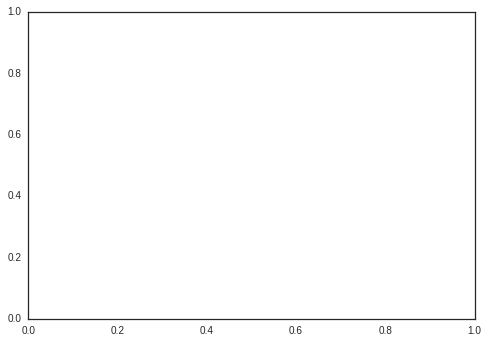

In [10]:
fig, ax = plt.subplots()
for i in range(1, len(weightSeries)):
    w0 = weightSeries[i-1:i]
    y = w0.values.flatten()
    x = df['Lambda'].values
    ax.plot(x,y, label="Weight for point {}".format(zero_weights[0][i]))
ax.set_title('Development of weights')
ax.set_ylabel('Value of weight')
ax.set_xlabel("Lambda")
ax.invert_yaxis()
ax.legend()
sns.despine(fig, ax)

In [ ]:
fig, ax = plt.subplots()
for i in range(1, len(weightSeries)):
    w0 = weightSeries[i-1:i]
    initial_weight = np.abs(initial_weights[i-1])
    y = np.abs(w0.values.flatten())
    y = np.divide(y*100, initial_weight)
    x = df['Lambda'].values
    ax.plot(x,y, label="Weight for point {}".format(zero_weights[0][i]))
ax.set_title('Development of weights')
ax.set_ylabel('Percent of initial absolute value')
ax.set_xlabel("Lambda")
ax.set_ylim(0, 200)
#ax.legend()
sns.despine(fig, ax)

# Group Analysis
1. Group weights.
2. Represent them in the format x_1, x_2, etc.
3. Calculate norms

In [24]:
grid = estimator._learner.getGrid()
storage = grid.getStorage()
dim = 10

In [25]:
def decode(num):
    zeros = np.zeros(len(num)) + 0.5
    return np.equal(zeros, num)

def coords_to_pred(coords):
    s = ""
    for i, c in enumerate(coords):
        if not c:
            s = s + "x{} ".format(i)
    s = s.strip()
    if s == "":
        return "bias"
    else:
        s = s.replace(" ", "-")
        return s

def group_weights_raw(grid):
    #commented code can be used later to calculat levels!
    storage = grid.getStorage()
    dim = storage.getDimension()

    coords = []
    #levels = []
    for x in range(0, grid.getSize()):
        gen0 = storage.get(x)
        curCoords = []
        #curLevels = []
        for i in range(0,dim):
            curCoords.append(gen0.getCoord(i))
            #curLevels.append(gen0.getLevel(i))
        curCoords = np.array(curCoords)
        #curLevels = np.array(curLevels)
        coords.append(curCoords)
        #levels.append(curLevels)
    #df = pd.DataFrame(coords)
    #df_level = pd.DataFrame(levels)

    terms = {}
    groups = {}
    terms_nums = []
    for num, r in enumerate(coords):
        d = tuple(decode(r))
        if d not in terms:
            terms[d] = []
            groups[d] = len(groups)
        terms[d].append(num)
        terms_nums.append(groups[d])
    
    return terms

def group_weights_format(grid):
    terms = group_weights_raw(grid)
    return dict([(coords_to_pred(coords), terms[coords]) for coords in terms])

In [26]:
groups = (group_weights_format(grid))
for key in groups:
    print key.count('x'), len(groups[key])

2 4
2 4
2 4
2 4
2 4
2 4
2 4
0 1
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
1 6
1 6
1 6
1 6
1 6
1 6
1 6
1 6
1 6
1 6
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4
2 4


In [27]:
groups

{'bias': [0],
 'x0': [1, 2, 3, 4, 5, 6],
 'x0-x1': [13, 14, 15, 16],
 'x0-x2': [23, 24, 25, 26],
 'x0-x3': [37, 38, 39, 40],
 'x0-x4': [55, 56, 57, 58],
 'x0-x5': [77, 78, 79, 80],
 'x0-x6': [103, 104, 105, 106],
 'x0-x7': [133, 134, 135, 136],
 'x0-x8': [167, 168, 169, 170],
 'x0-x9': [205, 206, 207, 208],
 'x1': [7, 8, 9, 10, 11, 12],
 'x1-x2': [27, 28, 29, 30],
 'x1-x3': [41, 42, 43, 44],
 'x1-x4': [59, 60, 61, 62],
 'x1-x5': [81, 82, 83, 84],
 'x1-x6': [107, 108, 109, 110],
 'x1-x7': [137, 138, 139, 140],
 'x1-x8': [171, 172, 173, 174],
 'x1-x9': [209, 210, 211, 212],
 'x2': [17, 18, 19, 20, 21, 22],
 'x2-x3': [45, 46, 47, 48],
 'x2-x4': [63, 64, 65, 66],
 'x2-x5': [85, 86, 87, 88],
 'x2-x6': [111, 112, 113, 114],
 'x2-x7': [141, 142, 143, 144],
 'x2-x8': [175, 176, 177, 178],
 'x2-x9': [213, 214, 215, 216],
 'x3': [31, 32, 33, 34, 35, 36],
 'x3-x4': [67, 68, 69, 70],
 'x3-x5': [89, 90, 91, 92],
 'x3-x6': [115, 116, 117, 118],
 'x3-x7': [145, 146, 147, 148],
 'x3-x8': [179, 180, 18

In [29]:
def calculate_group_norms(groups, weights):
    norms = {}
    for key in groups:  
        norms[key] = np.linalg.norm(weights[groups[key]])
    return norms

In [30]:
#t = df["Weights"][0]
#c = np.array([1, 2, 3, 4, 5, 6])
#calculate_group_norms(groups, w)

In [31]:
norm_rows = []
len_rows = []
lambdas = []
for _, i in df.iterrows():
    lambda_cur = i['Lambda']
    weights_cur = i['Weights']
    mse_cur = i['MSE']
    grp_len = dict([(key, len(list(np.where(weights_cur[groups[key]] != 0.0))[0])) for key in groups]) 
    norms = calculate_group_norms(groups, weights_cur)
    lambdas.append(lambda_cur)
    norm_rows.append(norms)
    len_rows.append(grp_len)

In [32]:
int_terms_norm = pd.DataFrame(norm_rows, index=lambdas)
int_terms_len = pd.DataFrame(len_rows, index=lambdas)

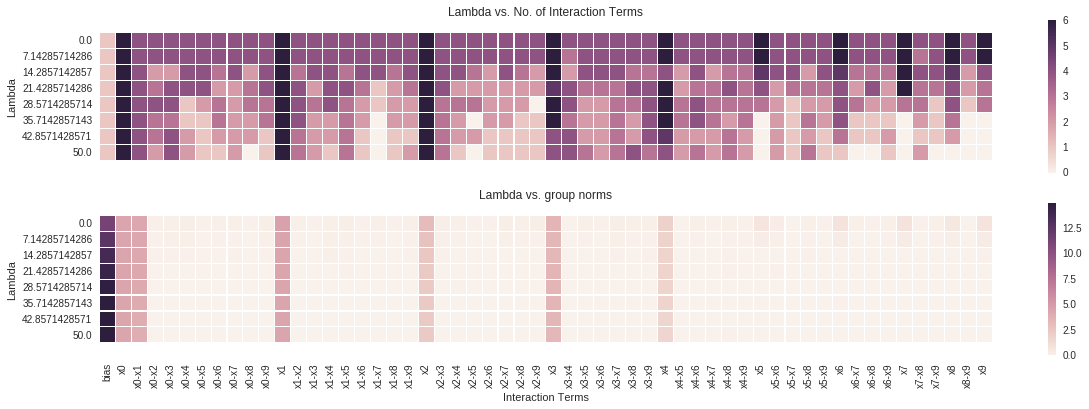

In [105]:
fig, axs = plt.subplots(2,1, sharex= True)
len_p = sns.heatmap(int_terms_len, linewidths=.1, square=True, ax=axs[0])
#len_p.set_xlabel("Interaction Terms")
len_p.set_ylabel("Lambda")
len_p.set_title("Lambda vs. No. of Interaction Terms")

norm_p = sns.heatmap(int_terms_norm, annot=False, linewidths=.1, square=True, ax=axs[1])
norm_p.set_xlabel("Interaction Terms")
norm_p.set_ylabel("Lambda")
norm_p.set_title("Lambda vs. group norms")

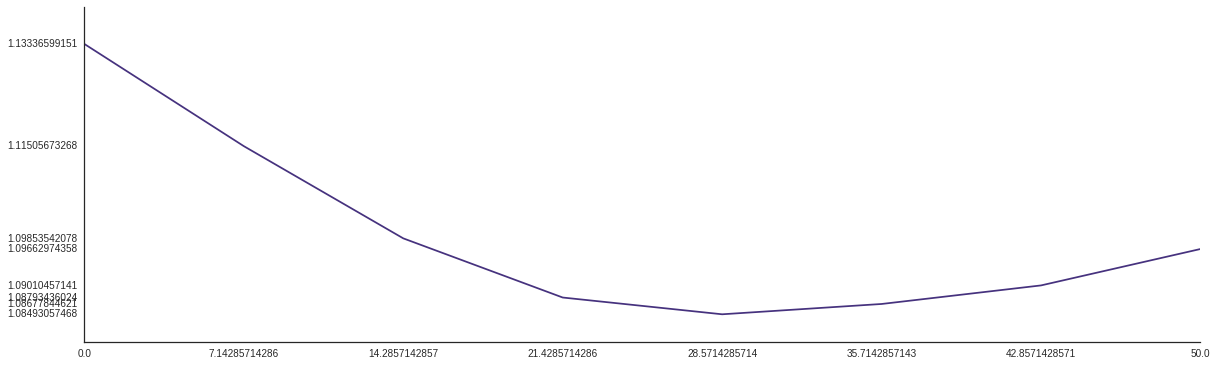

In [81]:
fig, ax = plt.subplots()
ax.plot(df['Lambda'], df['MSE'])
ax.set_xticks(df['Lambda'])
ax.set_xticklabels(df['Lambda'])
ax.set_yticks(df['MSE'])
ax.set_yticklabels(df['MSE'])
sns.despine(fig,ax)

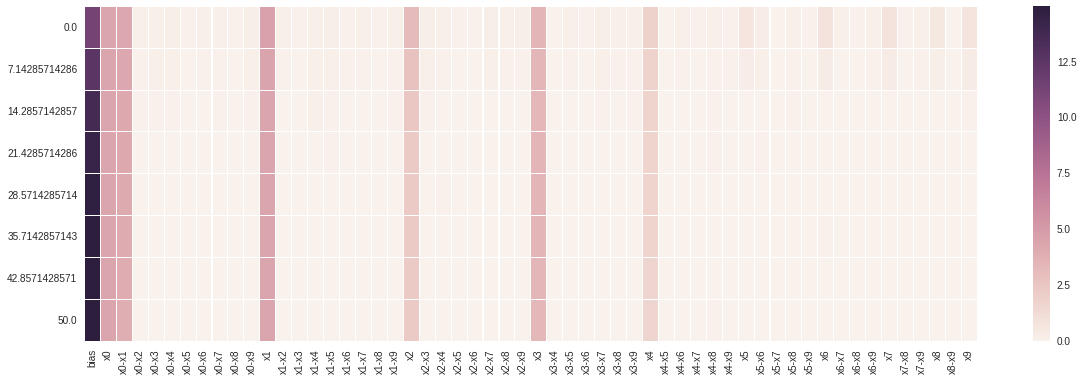

In [48]:
df['Weights'][4]

array([  1.59159930e+00,  -4.20249822e-02,  -9.30286777e-02,
         2.77369792e-02,  -1.48862718e-03,  -4.98854956e-03,
         9.47652607e-03,  -1.31112078e-01,  -9.48191993e-03,
        -1.31277472e-01,  -1.43717665e-02,  -8.57507113e-03,
        -6.13854124e-03,   9.98153036e-02,  -1.69736075e-03,
        -1.81741467e-02,   1.55700498e-02,  -1.23342169e-01,
        -3.45942865e-02,  -4.07821306e-01,  -7.33985607e-02,
        -5.16557602e-03,  -4.63973600e-03,   1.49589088e-01,
         1.15571114e-02,  -9.66897879e-03,   2.96618470e-02,
        -4.17895096e-02,   6.02559822e-02,   5.71680674e-02,
         1.53427901e-02,  -2.06502094e-02,  -2.10123855e-02,
        -1.91451541e-04,  -5.09842279e-03,  -9.30974815e-04,
         2.50472240e-04,   6.84170214e-03,   3.68378960e-03,
        -1.18097847e-03,  -1.50750545e-04,   3.62209723e-04,
         1.37309719e-03,   4.15193404e-03,   5.13487472e-03,
         1.55208660e-02,   1.63855361e-02,   1.05912547e-02,
         1.18045941e-02]

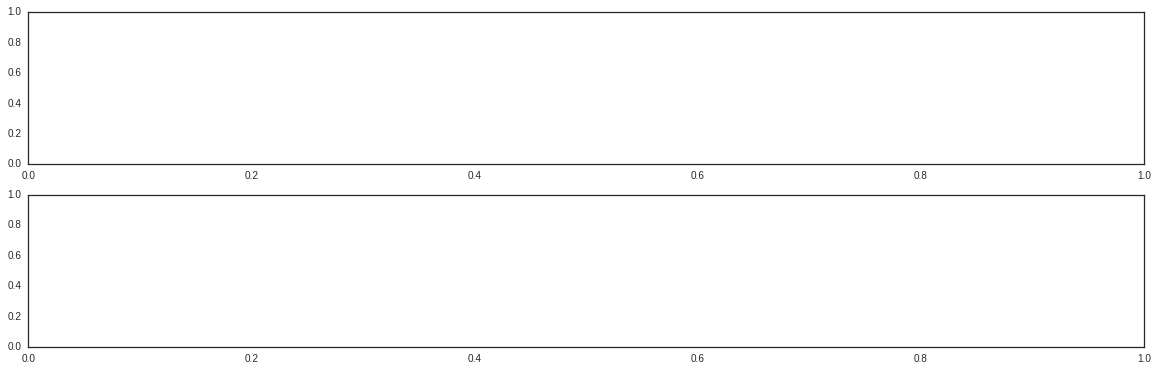

In [9]:
d = 2
lsum = 2
1.0/2**(-d-2*lsum), (1.0/4)**(lsum-d)

(64.0, 1.0)

0.5